In [269]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.spatial.distance import pdist,cdist, squareform
from functions import *
from sklearn.metrics import silhouette_score, adjusted_rand_score


# Load a standard dataset (PBMC3k)
adata = sc.datasets.pbmc3k_processed()
X = adata.obsm["X_pca"]

In [268]:
X.shape

(2638, 50)

In [ ]:
tsne = TSNE(n_components=2,perplexity=50.0, early_exaggeration=25.0)
X_tsne = tsne.fit_transform(squareform(pdist(X)))

db = DBSCAN(eps=5, min_samples=5).fit(X_tsne)
labels = db.labels_  # cluster labels, -1 means noise
order = np.argsort(labels)
X_reordered = X[order]

# Reorder dataset and labels
X_reordered_tsne = X_tsne[order]
labels_reordered = labels[order]



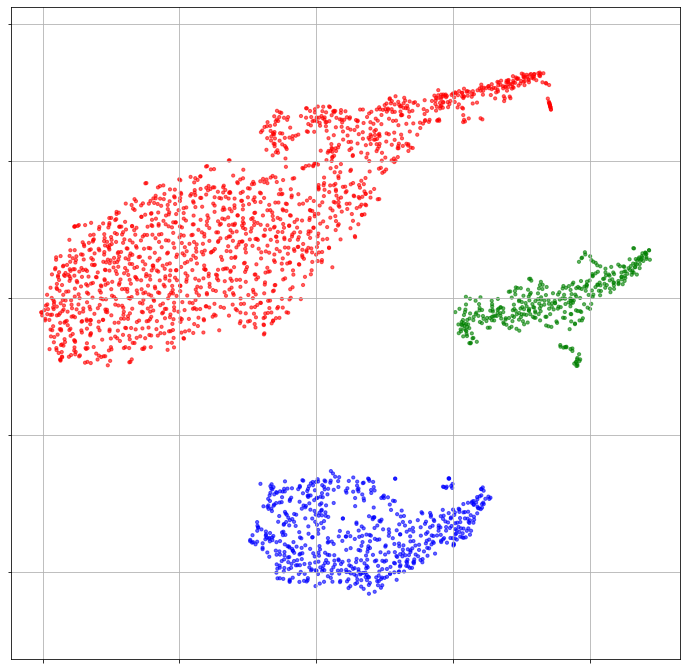

In [284]:
import matplotlib.colors as mcolors

cmap = mcolors.ListedColormap(["red", "green", "blue"])

fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, c=labels, cmap=cmap)

plt.savefig('visuals/single_cell/original_in_color.png')

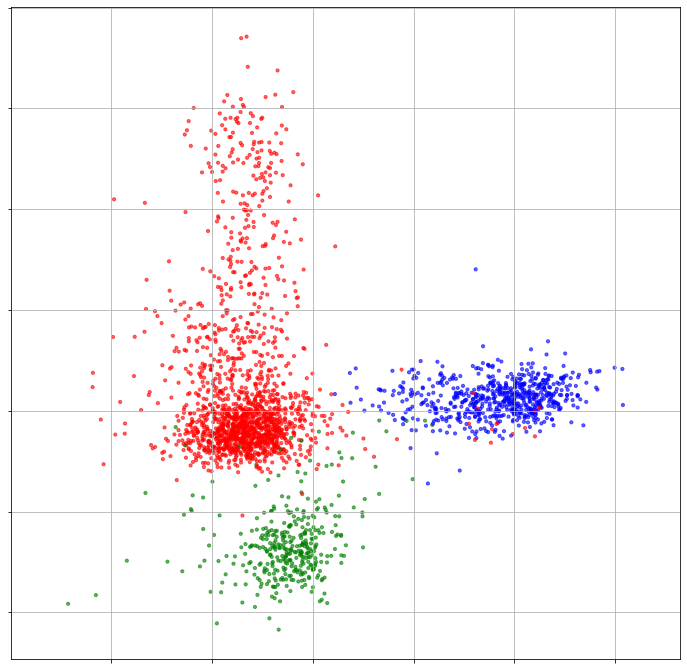

In [291]:
X_pca = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6,  c=labels, cmap=cmap)
plt.savefig('visuals/single_cell/pca_in_color.png')

[Text(5, 0, ''),
 Text(15, 0, ''),
 Text(25, 0, ''),
 Text(35, 0, ''),
 Text(45, 0, ''),
 Text(55, 0, ''),
 Text(65, 0, ''),
 Text(75, 0, ''),
 Text(85, 0, ''),
 Text(95, 0, ''),
 Text(105, 0, ''),
 Text(115, 0, ''),
 Text(125, 0, ''),
 Text(135, 0, ''),
 Text(145, 0, ''),
 Text(155, 0, ''),
 Text(165, 0, ''),
 Text(175, 0, ''),
 Text(185, 0, ''),
 Text(195, 0, ''),
 Text(205, 0, ''),
 Text(215, 0, ''),
 Text(225, 0, ''),
 Text(235, 0, ''),
 Text(245, 0, ''),
 Text(255, 0, ''),
 Text(265, 0, ''),
 Text(275, 0, ''),
 Text(285, 0, ''),
 Text(295, 0, ''),
 Text(305, 0, ''),
 Text(315, 0, ''),
 Text(325, 0, ''),
 Text(335, 0, ''),
 Text(345, 0, ''),
 Text(355, 0, ''),
 Text(365, 0, ''),
 Text(375, 0, ''),
 Text(385, 0, ''),
 Text(395, 0, ''),
 Text(405, 0, ''),
 Text(415, 0, ''),
 Text(425, 0, ''),
 Text(435, 0, ''),
 Text(445, 0, ''),
 Text(455, 0, ''),
 Text(465, 0, ''),
 Text(475, 0, ''),
 Text(485, 0, ''),
 Text(495, 0, ''),
 Text(505, 0, ''),
 Text(515, 0, ''),
 Text(525, 0, ''),
 Tex

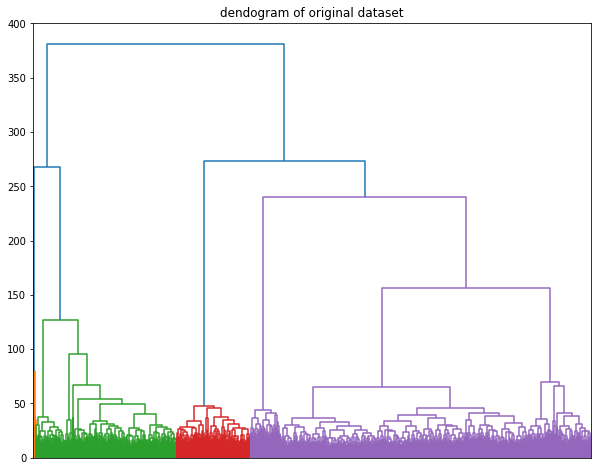

In [175]:
from scipy.cluster.hierarchy import dendrogram, linkage
fig, ax = plt.subplots(figsize=(10,8))
Z = linkage(X, method='ward')
_ = dendrogram(Z, ax=ax)
ax.set_title("dendogram of original dataset")
ax.set_xticklabels([]) 

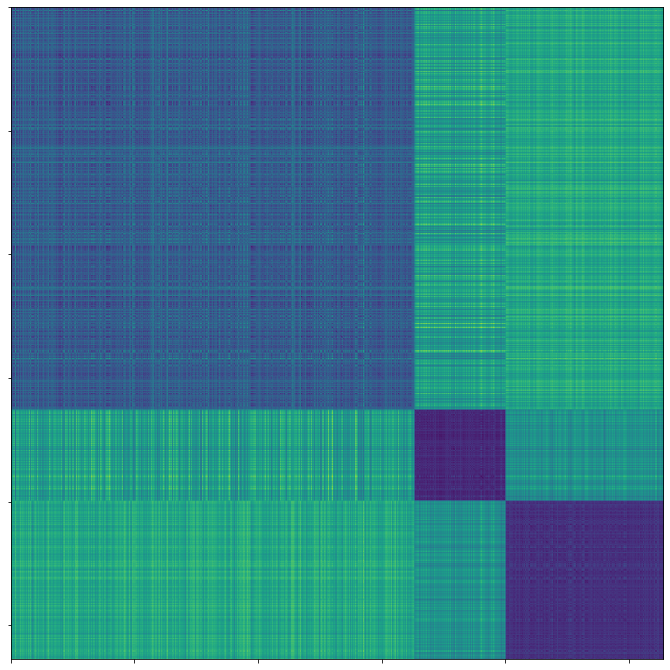

In [233]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(squareform(pdist(X_reordered_tsne)))
plt.savefig('visuals/single_cell/OG_tsne_idm.png')

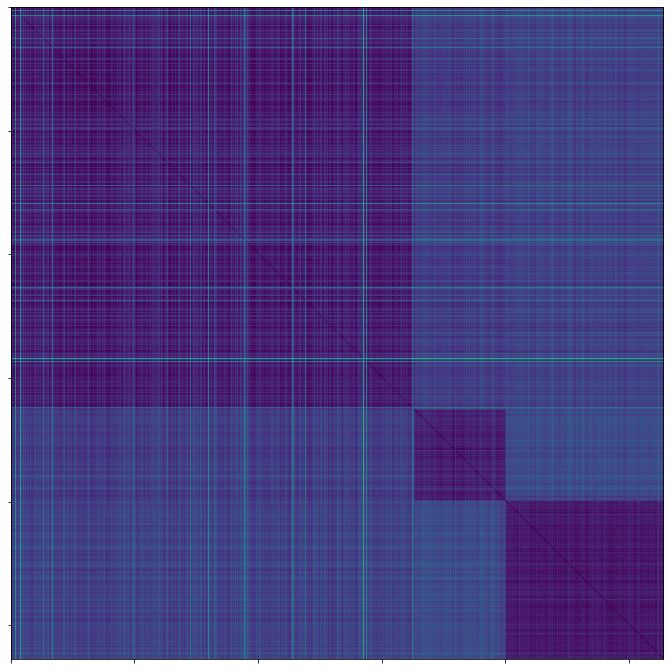

In [234]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(squareform(pdist(X_reordered)), vmin=13,vmax=50)
plt.savefig('visuals/single_cell/OG_og_idm.png')

In [277]:
c = 10000
n = len(X)
distance_mx = squareform(pdist(adata.obsm["X_pca"], metric='euclidean'))
blownup_distance_matrix = (distance_mx**2/c +  np.ones((n,n))- np.identity(n))**0.5
X_transformed = cMDS(blownup_distance_matrix, n-1)


X_transformed_tsne = TSNE(n_components=2,perplexity=70.0).fit_transform(blownup_distance_matrix)
#X_transformed_tsne = X_transformed_tsne[order]


In [293]:
print('Silhouette of DBSCAN on original \t', silhouette_score(X, labels))
#print('Silhouette of DBSCAN on transformed \t', silhouette_score(X_transformed, labels))

print('Silhouette of DBSCAN on t-sne \t\t', silhouette_score(X_tsne, labels))
print('Silhouette of DBSCAN on t-sne of trx \t\t', silhouette_score(X_transformed_tsne, labels))

print('Silhouette of DBSCAN on pca \t\t', silhouette_score(X_pca, labels))
print('Silhouette of DBSCAN on pca of trx \t\t', silhouette_score(X_pca_trx, labels))

Silhouette of DBSCAN on original 	 0.17945886
Silhouette of DBSCAN on t-sne 		 0.51431316
Silhouette of DBSCAN on t-sne of trx 		 0.61912555
Silhouette of DBSCAN on pca 		 0.50245863
Silhouette of DBSCAN on pca of trx 		 0.0013795744402996162


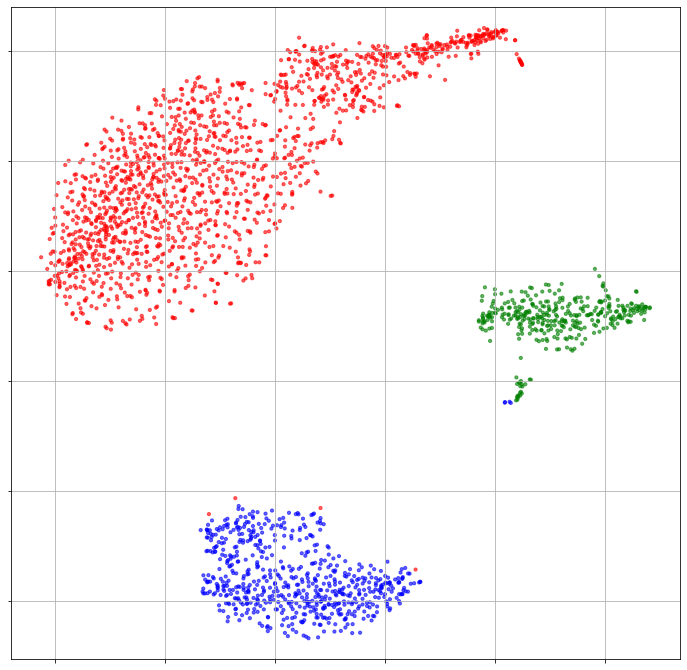

In [286]:
fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.scatter(X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=10, alpha=0.6, c=labels, cmap=cmap)
plt.savefig('visuals/single_cell/TRX_tsne_color.png')

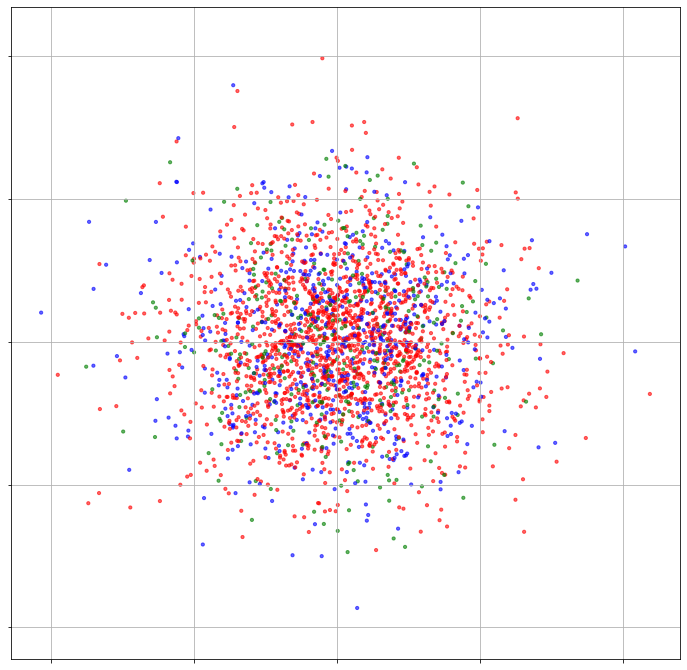

In [290]:
X_pca_trx = PCA(n_components=2).fit_transform(X_transformed)
fig, ax = plt.subplots(figsize=(12,12))
ax.grid('on')
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.scatter(X_pca_trx[:, 0], X_pca_trx[:, 1], s=10, alpha=0.6, c=labels, cmap=cmap)
plt.savefig('visuals/single_cell/TRX_pca_color.png')

[Text(5, 0, ''),
 Text(15, 0, ''),
 Text(25, 0, ''),
 Text(35, 0, ''),
 Text(45, 0, ''),
 Text(55, 0, ''),
 Text(65, 0, ''),
 Text(75, 0, ''),
 Text(85, 0, ''),
 Text(95, 0, ''),
 Text(105, 0, ''),
 Text(115, 0, ''),
 Text(125, 0, ''),
 Text(135, 0, ''),
 Text(145, 0, ''),
 Text(155, 0, ''),
 Text(165, 0, ''),
 Text(175, 0, ''),
 Text(185, 0, ''),
 Text(195, 0, ''),
 Text(205, 0, ''),
 Text(215, 0, ''),
 Text(225, 0, ''),
 Text(235, 0, ''),
 Text(245, 0, ''),
 Text(255, 0, ''),
 Text(265, 0, ''),
 Text(275, 0, ''),
 Text(285, 0, ''),
 Text(295, 0, ''),
 Text(305, 0, ''),
 Text(315, 0, ''),
 Text(325, 0, ''),
 Text(335, 0, ''),
 Text(345, 0, ''),
 Text(355, 0, ''),
 Text(365, 0, ''),
 Text(375, 0, ''),
 Text(385, 0, ''),
 Text(395, 0, ''),
 Text(405, 0, ''),
 Text(415, 0, ''),
 Text(425, 0, ''),
 Text(435, 0, ''),
 Text(445, 0, ''),
 Text(455, 0, ''),
 Text(465, 0, ''),
 Text(475, 0, ''),
 Text(485, 0, ''),
 Text(495, 0, ''),
 Text(505, 0, ''),
 Text(515, 0, ''),
 Text(525, 0, ''),
 Tex

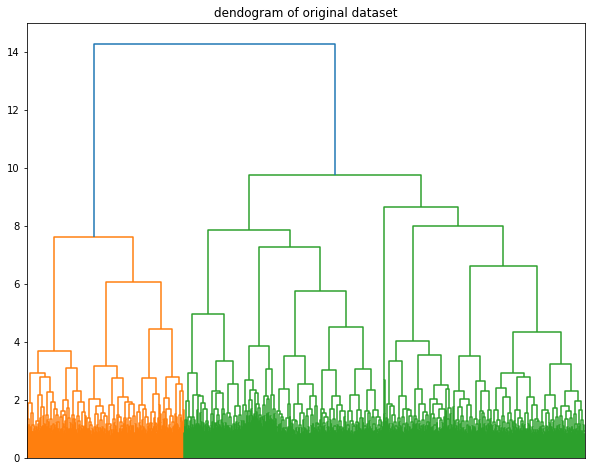

In [219]:
from scipy.cluster.hierarchy import dendrogram, linkage
fig, ax = plt.subplots(figsize=(10,8))
Z = linkage(X_blownup, method='ward')
_ = dendrogram(Z, ax=ax)
ax.set_title("dendogram of original dataset")
ax.set_xticklabels([]) 

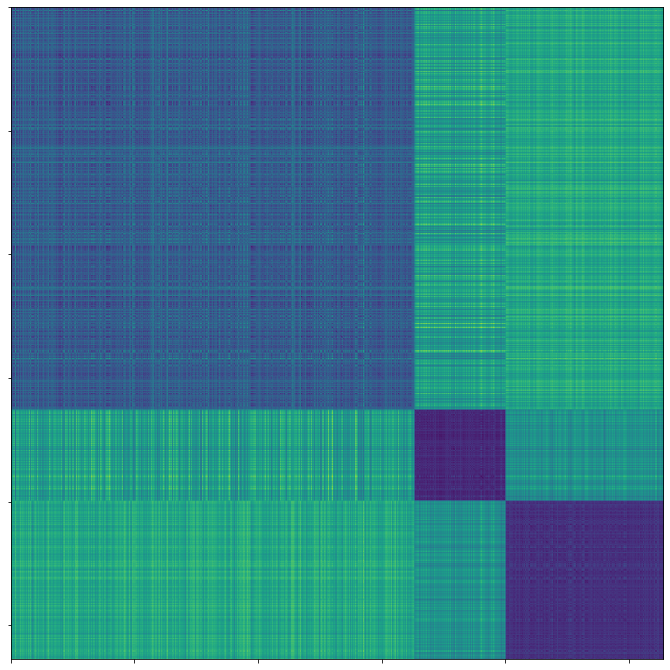

In [265]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.imshow(squareform(pdist(X_reordered_tsne)))
plt.savefig('visuals/single_cell/TRX_tsne_idm.png')

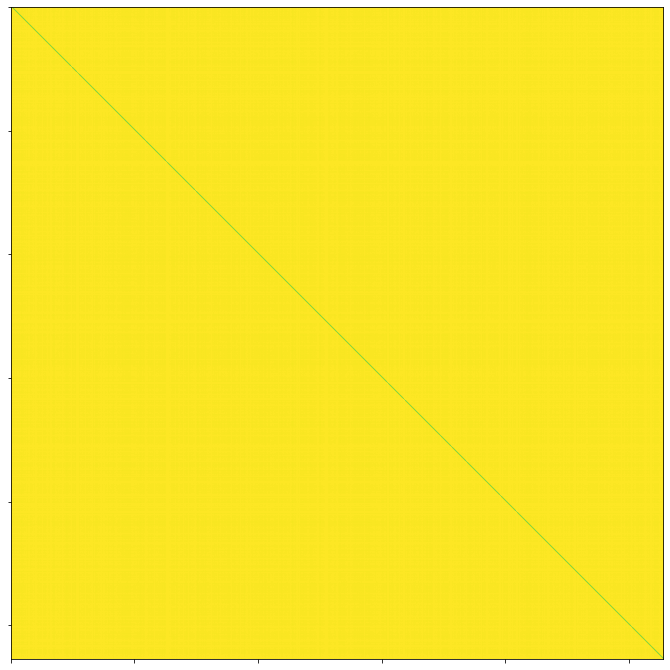

In [297]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticklabels([])
ax.set_yticklabels([])
vmin=np.min( blownup_distance_matrix.flatten() )
vmax=np.percentile( blownup_distance_matrix.flatten() , 75)
plt.imshow(blownup_distance_matrix, vmin=vmin, vmax=vmax)
plt.savefig('visuals/single_cell/TRX_og_idm.png')

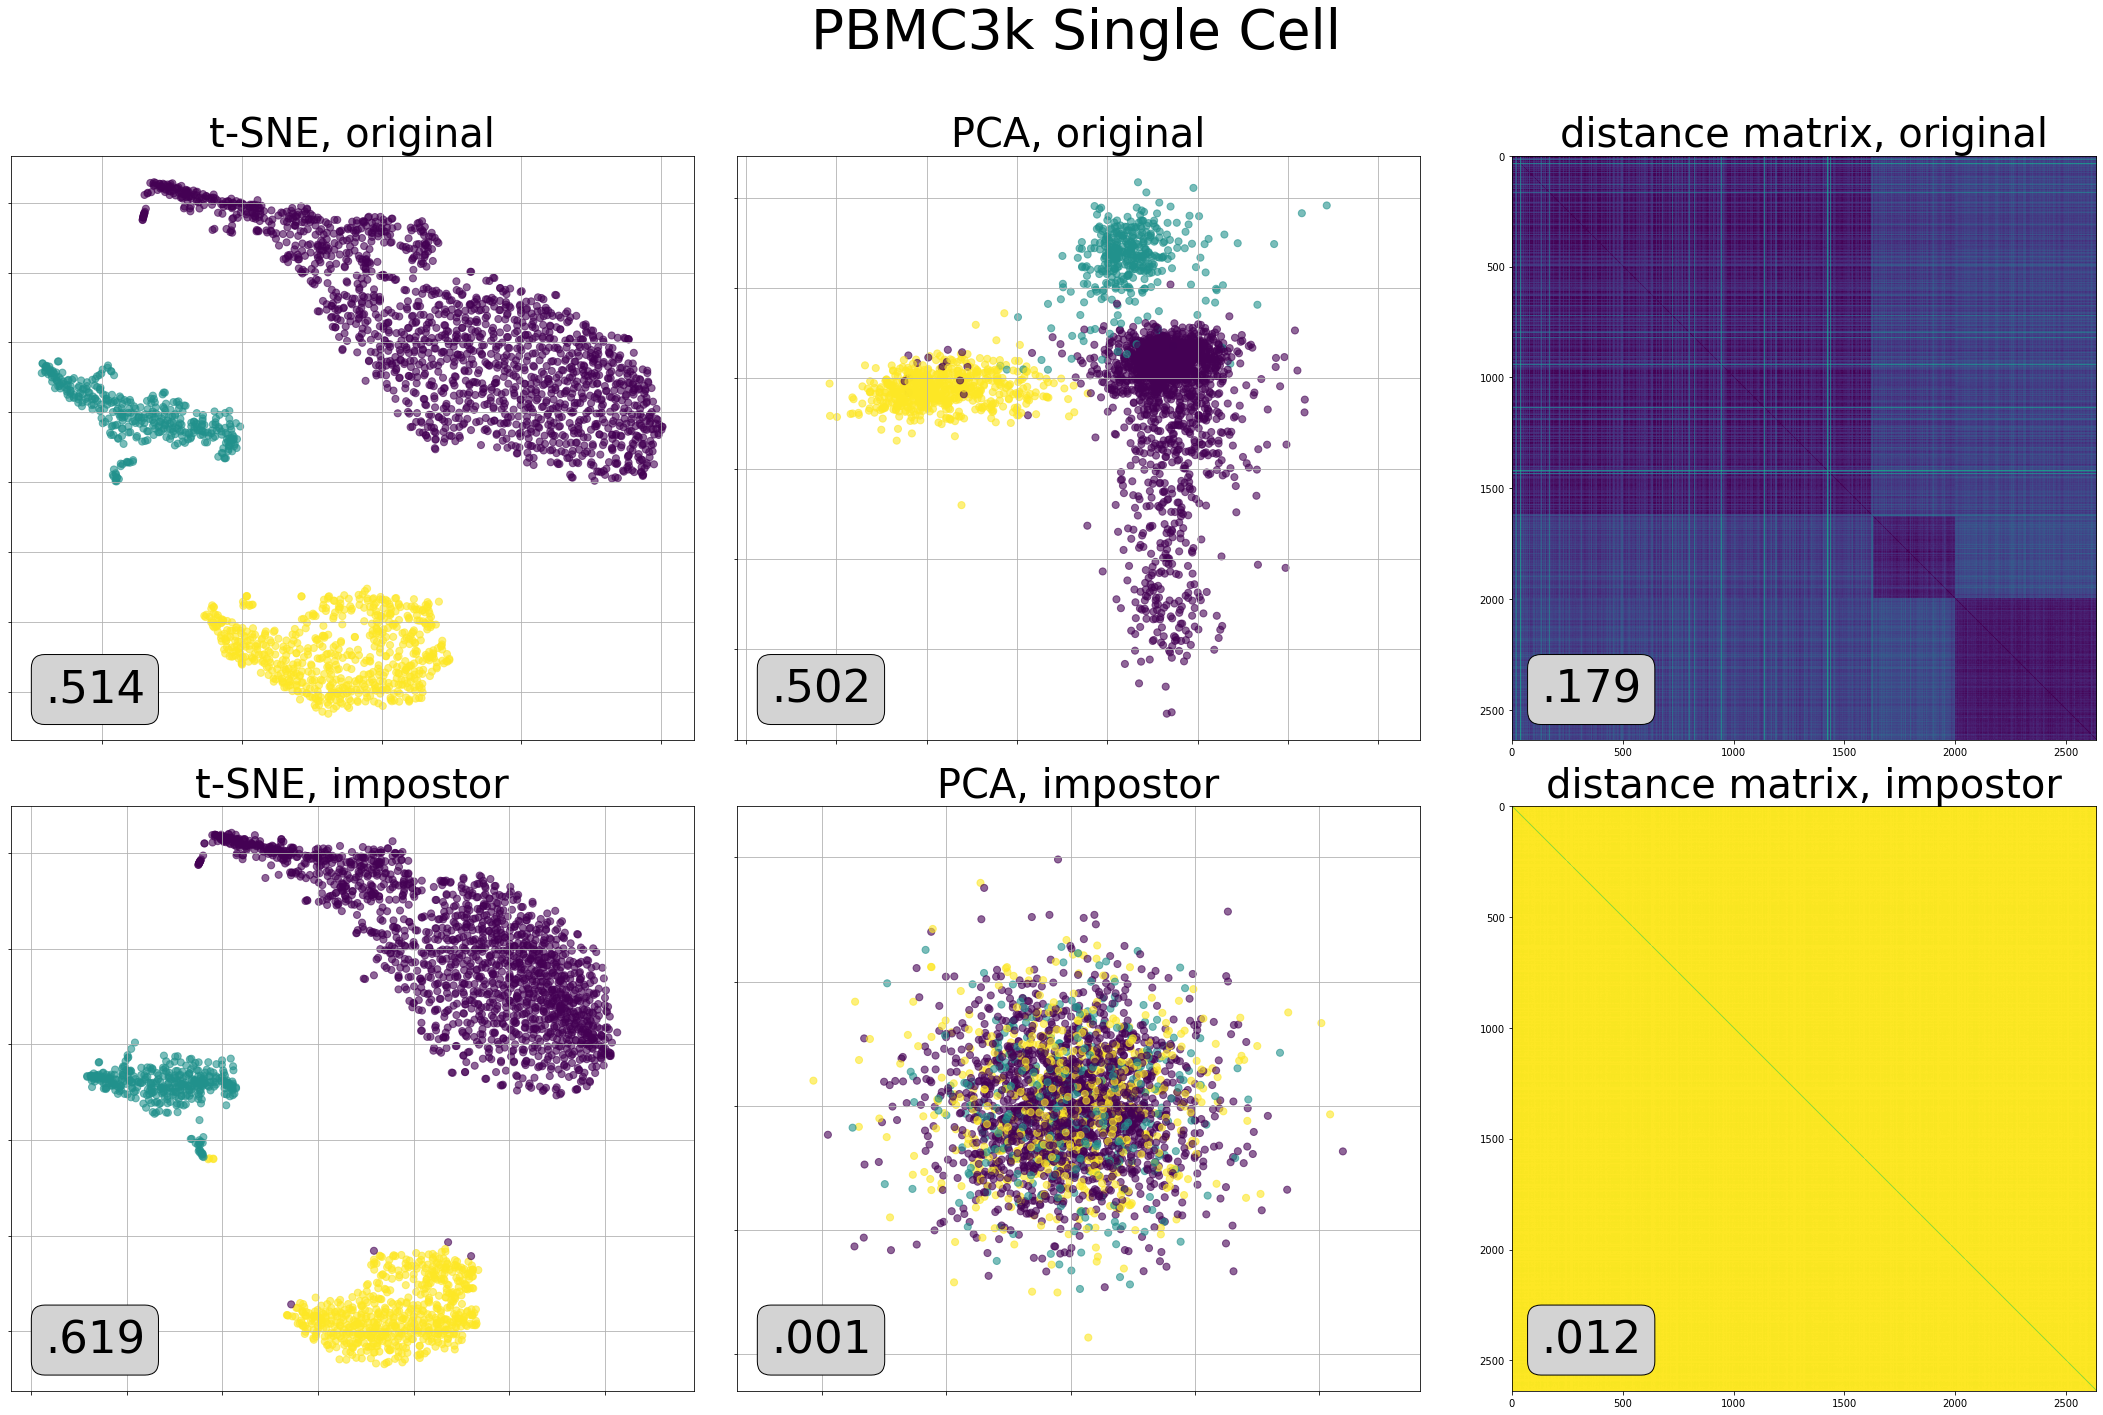

In [342]:
fig, axs = plt.subplots(2,3, figsize=(30,20))

#cmap = mcolors.ListedColormap(["purple", "green", "blue"])

for i in range(2):
    for j in range(2):
        axs[i,j].grid('on')
        axs[i,j].axis('equal')
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])

axs[0,0].text(0.05, 0.05, ".514",transform=axs[0,0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[0,0].set_title('t-SNE, original', fontsize=40)
axs[0,0].scatter(-X_tsne[:, 0], X_tsne[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)

axs[0,2].text(0.05, 0.05, ".179",transform=axs[0,2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[0,2].set_title('distance matrix, original', fontsize=40)
axs[0,2].imshow(squareform(pdist(X_reordered)), vmin=13,vmax=50)

axs[0,1].text(0.05, 0.05, ".502",transform=axs[0,1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[0,1].set_title('PCA, original', fontsize=40)
axs[0,1].scatter(-X_pca[:, 0], -X_pca[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)



axs[1,0].text(0.05, 0.05, ".619",transform=axs[1,0].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[1,0].set_title('t-SNE, impostor', fontsize=40)
axs[1,0].scatter(-X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)

axs[1,2].text(0.05, 0.05, ".012",transform=axs[1,2].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[1,2].set_title('distance matrix, impostor', fontsize=40)
axs[1,2].imshow(blownup_distance_matrix, vmin=vmin, vmax=vmax)

axs[1,1].text(0.05, 0.05, ".001",transform=axs[1,1].transAxes, 
              bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.3"),
              fontsize=45, ha="left", va="bottom")
axs[1,1].set_title('PCA, impostor', fontsize=40)
axs[1,1].scatter(X_pca_trx[:, 0], X_pca_trx[:, 1], s=50, alpha=0.6,  c=labels)#, cmap=cmap)

fig.suptitle('PBMC3k Single Cell\n', fontsize=55)

plt.tight_layout()
plt.savefig('visuals/single_cell/MAIN-single-cell.png', bbox_inches='tight')

(array([2.638000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

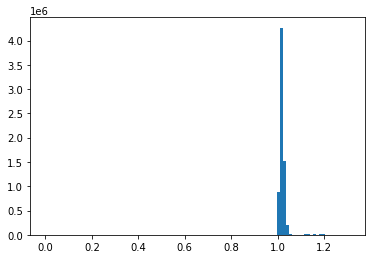

In [296]:
plt.hist(blownup_distance_matrix.flatten(), bins=100)

In [222]:
blownup_distance_matrix

array([[0.        , 1.1663298 , 1.11222512, ..., 1.1421163 , 1.17754163,
        1.08673115],
       [1.1663298 , 0.        , 1.20698554, ..., 1.14137261, 1.1292746 ,
        1.18814498],
       [1.11222512, 1.20698554, 0.        , ..., 1.14263742, 1.17562172,
        1.08392426],
       ...,
       [1.1421163 , 1.14137261, 1.14263742, ..., 0.        , 1.10063616,
        1.09563972],
       [1.17754163, 1.1292746 , 1.17562172, ..., 1.10063616, 0.        ,
        1.13482052],
       [1.08673115, 1.18814498, 1.08392426, ..., 1.09563972, 1.13482052,
        0.        ]])

aspect ratio of original 13.237927464059288
aspect ratio of transformed 84.44399800254764


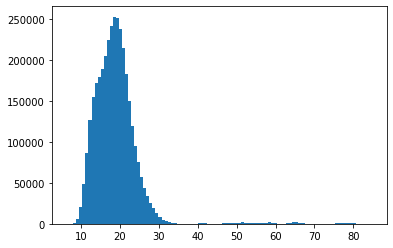

In [128]:
plt.hist(pdist(X), bins=100)
print('aspect ratio of original', max(pdist(X))/min(pdist(X)))
pdist_transformed = (pdist(X)**2 - min(pdist(X)**2) + 1)**0.5
print('aspect ratio of transformed (1)', max(pdist_transformed)/min(pdist_transformed))

In [ ]:
plt.imshow(squareform(pdist_transformed) )

In [110]:
adata.X.shape

(2638, 1838)

In [111]:

# Run DBSCAN
#X_tsne = adata.obsm["X_tsne"]
#X_tsne = X_transformed_tsne = TSNE( n_components=2).fit_transform(X)#(adata.obsm["X_pca"])


X = adata.obsm["X_pca"]#adata.X
X_tsne = tsne.fit_transform(squareform(pdist(adata.obsm["X_pca"])))


db = DBSCAN(eps=5, min_samples=5).fit(X_tsne)
labels = db.labels_  # cluster labels, -1 means noise
order = np.argsort(labels)
X_reordered = X[order]

# Reorder dataset and labels
X_reordered_tsne = X_tsne[order]
labels_reordered = labels[order]

#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, c=labels)

#plt.imshow(squareform(pdist(X_reordered_tsne)))



fig, axs = plt.subplots(2,3, figsize=(14,7))
axs[0,0].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, color='black')
axs[0,1].imshow(squareform(pdist(X_reordered_tsne)))
axs[0,2].imshow(squareform(pdist(X_reordered)))


c = 6000
n = len(X)
distance_mx = squareform(pdist(adata.obsm["X_pca"], metric='euclidean'))
blownup_distance_matrix = (distance_mx**2/c +  np.ones((n,n))- np.identity(n))**0.5

X_transformed_tsne = TSNE(n_components=2,perplexity=70.0).fit_transform(blownup_distance_matrix)
X_transformed_tsne = X_transformed_tsne[order]

axs[1,0].scatter(X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=10, alpha=0.6, color='black')
axs[1,1].imshow(squareform(pdist(X_transformed_tsne)))
axs[1,2].imshow(blownup_distance_matrix, vmin=30)
#axs[1,2].legend()


Error in callback <function _draw_all_if_interactive at 0x7fa6e2499f70> (for post_execute):


ValueError: minvalue must be less than or equal to maxvalue

ValueError: minvalue must be less than or equal to maxvalue

<Figure size 1008x504 with 6 Axes>

In [67]:
big_dists = blownup_distance_matrix.flatten()
ixs = np.where(big_dists != 0)
max(big_dists[ixs])/min(big_dists[ixs])

1.035021123329336

In [ ]:
big_dists = blownup_distance_matrix.flatten()
ixs = np.where(big_dists != 0)
max(big_dists[ixs])/min(big_dists[ixs])

In [63]:
dists = distance_mx.flatten()
ixs = np.where(dists != 0)
max(dists[ixs])/min(dists[ixs])

13.237927464059288

(array([2.638000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.183000e+04, 3.756380e+05,
        8.842760e+05, 9.546520e+05, 1.056588e+06, 1.082030e+06,
        9.051320e+05, 6.313540e+05, 3.997600e+05, 2.478080e+05,
        1.489060e+05, 9.243400e+04, 5.264800e+04, 2.531000e+04,
        1.160200e+04, 5.152000e+03, 1.972000e+03, 7.540000e+02,
        2.040000e+02, 9.200000e+01, 2.160000e+02, 1.156000e+03,
        1.862000e+03, 1.136000e+03, 5.720000e+02, 2.380000e+02,
        3.200000e+02, 1.014000e+03, 1.90

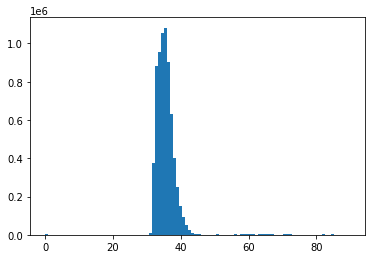

In [33]:
plt.hist(blownup_distance_matrix.flatten(), bins=100)

In [21]:
blownup_distance_matrix -= 10*np.eye(n)

KeyboardInterrupt: 

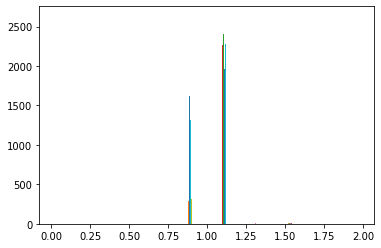

In [22]:
plt.hist(blownup_distance_matrix.)

(array([2.638000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 8.679400e+04,
        1.138124e+06, 1.455250e+06, 1.588974e+06, 1.251112e+06,
        7.032860e+05, 3.557320e+05, 1.747380e+05, 8.545200e+04,
        3.294200e+04, 1.117400e+04, 3.408000e+03, 9.260000e+02,
        1.940000e+02, 1.660000e+02, 1.40

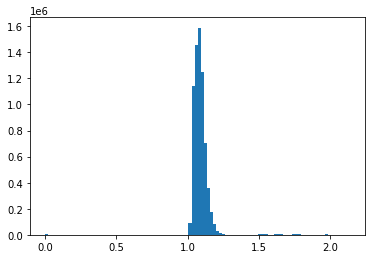

In [15]:
plt.hist(blownup_distance_matrix.flatten(), bins=100)

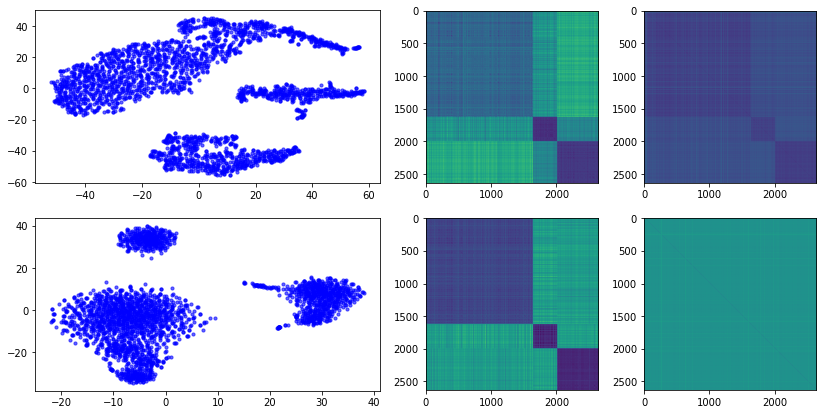

In [16]:
fig, axs = plt.subplots(2,3, figsize=(14,7), gridspec_kw={'width_ratios':[2,1,1]})
axs[0,0].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, color='blue')
axs[0,1].imshow(squareform(pdist(X_reordered_tsne)))
axs[0,2].imshow(squareform(pdist(X_reordered)))
#axs[0,2].legend()

axs[1,0].scatter(X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=10, alpha=0.6, color='blue')
axs[1,1].imshow(squareform(pdist(X_transformed_tsne)))
axs[1,2].imshow(blownup_distance_matrix)
#axs[1,2].legend()

In [17]:
np.min(blownup_distance_matrix + 100*np.eye(n))

1.0101778847313625

In [18]:
X_transformed = cMDS(blownup_distance_matrix, n-1)[order]

X_transformed[12] = np.mean(X_transformed)
X_tsne = tsne.fit_transform(squareform(pdist(X_transformed)))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6, color='blue')

KeyboardInterrupt: 

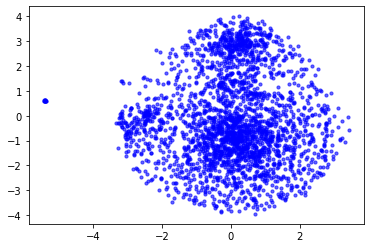

In [ ]:
X_transformed_tsne = TSNE( n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate="auto",
    n_iter=1000,
    init="pca",
    random_state=0,     # for reproducibility
    method="barnes_hut",
    angle=0.5,
    metric="euclidean").fit_transform(X_transformed)#(adata.obsm["X_pca"])
plt.scatter(X_transformed_tsne[:, 0], X_transformed_tsne[:, 1], s=10, alpha=0.6, color='blue')

In [ ]:
sc.tl.tsne(adata)

In [ ]:
import pickle

# Save object
with open("pbmc3k_processed.pkl", "wb") as f:
    pickle.dump(adata, f)

# Load object
#with open("pbmc3k_processed.pkl", "rb") as f:
#    loaded_object = pickle.load(f)

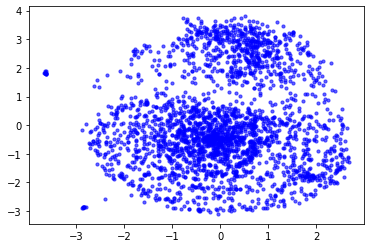

In [ ]:
X = adata.X
tsne = TSNE(n_components=2, random_state=0, init="pca", perplexity=60)
Y = tsne.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], s=10, alpha=0.6, color='blue')

In [ ]:
import scanpy as sc
import inspect

# Get all callable dataset functions from scanpy.datasets
dataset_funcs = {
    name: func for name, func in inspect.getmembers(sc.datasets, inspect.isfunction)
    if not name.startswith("_")  # ignore private functions
}
print("Available datasets:", list(dataset_funcs.keys()))

Available datasets: ['blobs', 'burczynski06', 'ebi_expression_atlas', 'krumsiek11', 'moignard15', 'paul15', 'pbmc3k', 'pbmc3k_processed', 'pbmc68k_reduced', 'toggleswitch', 'visium_sge']


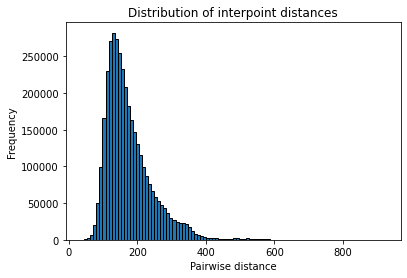

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Example dataset
adata = sc.datasets.pbmc3k()

# Take the raw counts (or log-normalized if you prefer)
X = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X

# Compute pairwise distances (Euclidean by default)
D = pairwise_distances(X, metric='euclidean')

# Flatten the upper triangle (avoid duplicates and zero diagonals)
dists = D[np.triu_indices_from(D, k=1)]

# Plot histogram
plt.hist(dists, bins=100, edgecolor='k')
plt.xlabel("Pairwise distance")
plt.ylabel("Frequency")
plt.title("Distribution of interpoint distances")
plt.show()

In [ ]:
from scipy.spatial.distance import pdist,cdist, squareform

cdist(adata, adata)

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/scipy/spatial/distance.py:2909: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  XA = np.asarray(XA)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/scipy/spatial/distance.py:2910: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  XB = np.asarray(XB)


ValueError: XA must be a 2-dimensional array.